In [20]:
import pandas as pd
import numpy as np
import csv

df_abalone = pd.read_csv('dataset/abalone.csv')
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [21]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# 신경망
## 순전파 -> 역전파 -> 파라미터 갱신
## 파라미터 초기화
## 데이터 분리하기(독립&종속 / 학습&테스트)
## 신경망 학습(설계)
## 순전파 -> 역전파
## 손실함수 구현
## 손실함수 미분
## 신경망 연산 구현
## 평가
## 전체 실행 함수

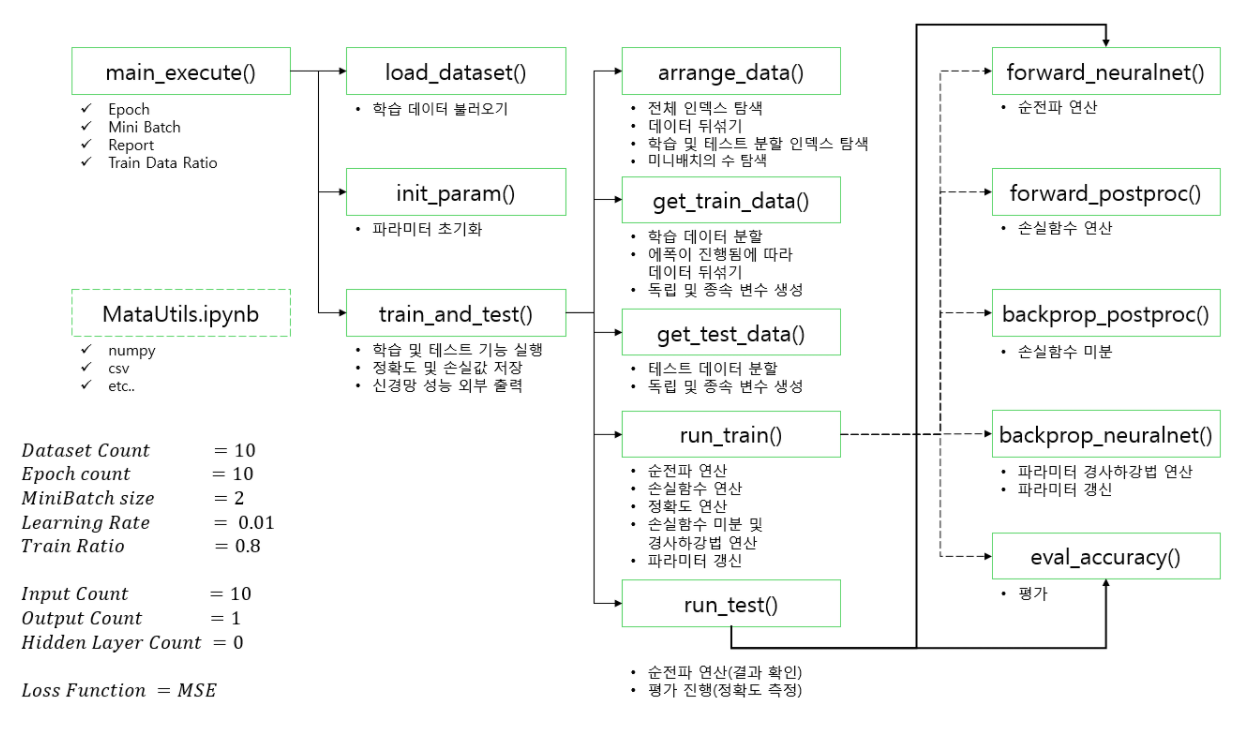

In [22]:
def main_execute(epoch_count = 10, mb_size = 10, report = 2, train_ratio = 0.8):
    load_dataset()
    weight_init,bias_init = init_param()
    losses_mean_row, accs_mean_row, final_acc = train_and_test(epoch_count, mb_size, report, train_ratio)
    return weight_init,bias_init, losses_mean_row, accs_mean_row, final_acc 

In [23]:
def load_dataset() :

    with open('dataset/abalone.csv') as csvfile :
        csv_reader = csv.reader(csvfile)
        next(csv_reader) # 첫번째 행 건너뜀(설명이므로)
        rows = []
        for row in csv_reader :
            rows.append(row)

    global data, input_cnt, output_cnt

    input_cnt, output_cnt = 10, 1
    data = np.zeros([len(rows), input_cnt+output_cnt])
    
    for n,row in enumerate(rows):
        if row[0] == 'M' : data[n,0] = 1
        if row[0] == 'F' : data[n,1] = 1
        if row[0] == 'I' : data[n,2] = 1
        data[n, 3:] = row[1:]


In [45]:
%run MetaUtils.ipynb

In [46]:
load_dataset()
print(data)

[[ 1.      0.      0.     ...  0.101   0.15   15.    ]
 [ 1.      0.      0.     ...  0.0485  0.07    7.    ]
 [ 0.      1.      0.     ...  0.1415  0.21    9.    ]
 ...
 [ 1.      0.      0.     ...  0.2875  0.308   9.    ]
 [ 0.      1.      0.     ...  0.261   0.296  10.    ]
 [ 1.      0.      0.     ...  0.3765  0.495  12.    ]]


In [47]:
def init_param() :
    global weight,bias
    weight_initial = []
    bias_initial = []
    weight = np.random.normal(RND_MEAN ,RND_STD, size = [input_cnt,output_cnt])
    bias = np.zeros([output_cnt])
    print("Initial Weight Value : {}".format(weight))
    print("Initial Bias : {}".format(bias))
    weight_initial.append(weight)
    bias_initial.append(bias)
    
    return weight_initial, bias_initial

In [48]:
weight_initial, bias_initial = init_param()

Initial Weight Value : [[ 0.00226234]
 [ 0.0028559 ]
 [-0.00940068]
 [ 0.01098868]
 [ 0.01015147]
 [-0.03626924]
 [ 0.01259754]
 [ 0.01132409]
 [ 0.01327087]
 [-0.03105166]]
Initial Bias : [0.]


In [49]:
weight

array([[ 0.00226234],
       [ 0.0028559 ],
       [-0.00940068],
       [ 0.01098868],
       [ 0.01015147],
       [-0.03626924],
       [ 0.01259754],
       [ 0.01132409],
       [ 0.01327087],
       [-0.03105166]])

In [50]:
mb_size = 2
train_ratio = 0.8
print(data.shape)

(4177, 11)


In [51]:
def arrange_data(mb_size, train_ratio):
    global shuffle_map, test_begin_idx
    
    shuffle_map = np.arange(data.shape[0])
    np.random.shuffle(shuffle_map)
    mini_batch_step_count = int(data.shape[0]*train_ratio // mb_size)
    test_begin_idx = mini_batch_step_count + mb_size
    
    return mini_batch_step_count

In [52]:
mini_batch_step_count = arrange_data(mb_size = 2, train_ratio = 0.8)
print("mini_batch_step_count : ", mini_batch_step_count)
print("shuffle_map : ",shuffle_map[:5])
print("test_begin_index : ", test_begin_idx)

mini_batch_step_count :  1670
shuffle_map :  [1005 1894  797 4102 1790]
test_begin_index :  1672


In [53]:
def get_test_data():
    test_data = data[shuffle_map[test_begin_idx:]]
    return test_data[:,:-output_cnt],test_data[:,-output_cnt:]

In [54]:
test_x, test_y = get_test_data()
print(test_x[:10])
print("="*100)
print(test_y[:10])

[[1.0000e+00 0.0000e+00 0.0000e+00 6.0000e-01 4.6500e-01 2.0000e-01
  1.2590e+00 6.4050e-01 1.9850e-01 3.5700e-01]
 [0.0000e+00 0.0000e+00 1.0000e+00 2.8000e-01 1.2000e-01 7.5000e-02
  1.1700e-01 4.5500e-02 2.9000e-02 3.4500e-02]
 [1.0000e+00 0.0000e+00 0.0000e+00 6.2500e-01 4.8500e-01 1.6000e-01
  1.2135e+00 6.3100e-01 2.2350e-01 3.0200e-01]
 [0.0000e+00 1.0000e+00 0.0000e+00 4.5000e-01 3.4500e-01 1.1500e-01
  4.9600e-01 1.9050e-01 1.1700e-01 1.4000e-01]
 [0.0000e+00 1.0000e+00 0.0000e+00 5.8000e-01 4.4000e-01 1.7500e-01
  1.0730e+00 4.0050e-01 2.3450e-01 3.3500e-01]
 [0.0000e+00 0.0000e+00 1.0000e+00 2.4000e-01 1.8500e-01 6.0000e-02
  6.5500e-02 2.9500e-02 5.0000e-04 2.0000e-02]
 [0.0000e+00 0.0000e+00 1.0000e+00 4.3500e-01 3.3500e-01 1.1000e-01
  4.1100e-01 2.0250e-01 9.4500e-02 1.0000e-01]
 [0.0000e+00 1.0000e+00 0.0000e+00 5.0000e-01 4.0000e-01 1.6500e-01
  7.1050e-01 2.7000e-01 1.4550e-01 2.2500e-01]
 [0.0000e+00 0.0000e+00 1.0000e+00 5.5500e-01 4.3500e-01 1.4000e-01
  7.6500e-01

In [55]:
#nth:미니배치 덩어리의 횟수
def get_train_data(mb_size,nth):
    if nth == 0 :
        np.random.shuffle(shuffle_map[:test_begin_idx])
        
    train_data = data[shuffle_map[mb_size*nth : mb_size*(nth+1)]]
    return train_data[:,:-output_cnt],train_data[:,-output_cnt:]

In [56]:
train_x, train_y = get_train_data(mb_size = 10, nth = 0)
print(train_x)
print("=============================")
print(train_y)

[[1.     0.     0.     0.56   0.41   0.165  0.93   0.3505 0.237  0.3   ]
 [1.     0.     0.     0.62   0.495  0.195  1.5145 0.579  0.346  0.5195]
 [0.     0.     1.     0.525  0.4    0.13   0.6455 0.325  0.1245 0.17  ]
 [0.     0.     1.     0.455  0.375  0.125  0.533  0.233  0.106  0.185 ]
 [0.     1.     0.     0.615  0.48   0.165  1.1615 0.513  0.301  0.305 ]
 [1.     0.     0.     0.45   0.335  0.14   0.478  0.1865 0.115  0.16  ]
 [1.     0.     0.     0.62   0.485  0.205  1.219  0.3875 0.2505 0.385 ]
 [0.     0.     1.     0.28   0.215  0.07   0.124  0.063  0.0215 0.03  ]
 [0.     1.     0.     0.55   0.38   0.165  1.205  0.543  0.294  0.3345]
 [0.     0.     1.     0.34   0.265  0.08   0.2015 0.09   0.0475 0.055 ]]
[[13.]
 [15.]
 [ 8.]
 [ 8.]
 [10.]
 [11.]
 [14.]
 [ 6.]
 [10.]
 [ 5.]]


In [57]:
def run_test(x, y):
    accuracy = 100
    return accuracy
run_test(0,0)

100

In [58]:
def run_train(x, y):
    loss = 0
    accuracy = 95
    return loss, accuracy
run_train(0,0)

(0, 95)

In [75]:
def train_and_test(epoch_count,mb_size,report,train_ratio):
    mini_batch_step_count = arrange_data(mb_size,train_ratio)
    
    test_x, test_y = get_test_data()
    losses_mean_row = []
    accs_mean_row = []
    for epoch in range(epoch_count):
        losses = []
        accs = []
        for n in range(mini_batch_step_count):
            train_x, train_y = get_train_data(mb_size,n)
            
            loss, acc = run_train(train_x,train_y)
            losses.append(loss)
            accs.append(acc)
            
        if report > 0 and (epoch+1)%report == 0:
            acc = run_test(test_x,test_y)
            print("Epoch {} : Train - Loss = {:.3f}, Accuracy = {:.3f}% / Test - Accuracy = {:.3f}%"
                  .format(epoch+1,np.mean(losses),np.mean(accs),acc))
        
        losses_mean = np.mean(losses)
        accs_mean = np.mean(acc) * 100
        
        losses_mean_row.append(losses_mean)
        accs_mean_row.append(accs_mean)
    final_acc = run_test(test_x, test_y)
    print("="*30,"Final Test","="*30)
    print("\nFinal Accuracy : {:.3f}%".format(final_acc))
    
    return losses_mean_row, accs_mean_row, final_acc

In [96]:
result = train_and_test(epoch_count = 10,
                       mb_size = 2,
                       report = 2,
                       train_ratio = 0.8)

Epoch 2 : Train - Loss = 0.000, Accuracy = 95.000% / Test - Accuracy = 100.000%
Epoch 4 : Train - Loss = 0.000, Accuracy = 95.000% / Test - Accuracy = 100.000%
Epoch 6 : Train - Loss = 0.000, Accuracy = 95.000% / Test - Accuracy = 100.000%
Epoch 8 : Train - Loss = 0.000, Accuracy = 95.000% / Test - Accuracy = 100.000%
Epoch 10 : Train - Loss = 0.000, Accuracy = 95.000% / Test - Accuracy = 100.000%
============================== Final Test ==============================

Final Accuracy : 100.000%


In [99]:
def forward_neuralnet(x): #순전파
    y_hat = np.matmul(x,weight) + bias
    return y_hat,x

In [102]:
y_hat, _ = forward_neuralnet(train_x)
print("y_hat : \n",y_hat)
print(y_hat.shape)

y_hat : 
 [[ 0.0161082 ]
 [ 0.02112382]
 [ 0.00389945]
 [-0.00011252]
 [ 0.02346731]
 [ 0.01022176]
 [ 0.01767756]
 [-0.00505084]
 [ 0.02161669]
 [-0.00339583]]
(10, 1)


In [91]:
def forward_postproc(y_hat,y):
    diff = y_hat - y
    square = np.square(diff)
    loss = np.mean(square)
    
    return loss

In [95]:
loss = forward_postproc(y_hat,train_y)
print(loss)

109.73621125513094


In [93]:
def eval_accuracy(y_hat,y):
    mdiff = np.mean(np.abs((y_hat-y)/y))
    return 1-mdiff

In [94]:
acc = eval_accuracy(y_hat,train_y)
print("Acc:{:.3f}%".format(acc*100))

Acc:0.083%


In [ ]:
def backprop_neuralnet(G_output,x):
    global weight, bias
    x_trans = x.transpose()
    G_w = np.matmul(x_trans, G_output)
    G_b = np.sun(G_output, axis=0)
    
    weight -= LEARNING_RATE * G_w
    bias -= LEARNING_RATE * G_b

In [77]:
y_hat = forward_neuralnet(train_x)
print("y_hat : \n", y_hat)
print(y_hat.shape)

y_hat : 
 [[ 0.0161082 ]
 [ 0.02112382]
 [ 0.00389945]
 [-0.00011252]
 [ 0.02346731]
 [ 0.01022176]
 [ 0.01767756]
 [-0.00505084]
 [ 0.02161669]
 [-0.00339583]]
(10, 1)


In [82]:
mb_size = 10
mb_size * 0 : mb_size * (0+1)
mb_size * 1 : mb_size * (1+1)
mb_size * 2 : mb_size * (2+1)
mb_size * 3 : mb_size * (3+1)

SyntaxError: illegal target for annotation (<ipython-input-82-7f49a1246245>, line 2)